In [14]:
import network as net
import numpy as np
import sklearn.datasets as skd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
def number(num):
    x = np.array(num)
    if x.size == 64:
        matrix = x.reshape(8,8)
        
        plt.figure(figsize=(4, 4))
        sns.heatmap(matrix, cmap='gray',square=True, xticklabels=False, yticklabels=False, cbar=False)
    else:
        print('data in the incorrect format, array must be 64 length')

In [16]:
def image_to_array(path):
    img = Image.open(path).convert('L')
    
    img_array = np.array(img)
    img_array_scaled = (img_array / 255) * 16
    
    img_array_scaled = np.round(img_array_scaled).astype(int)
    
    return img_array_scaled.flatten()

In [17]:
digits = skd.load_digits()

X = digits.data
y = digits.target

# Normalizar los datos (esto puede ayudar a ADALINE)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear instancia de la red neuronal (construcción de Kesler)
perceptron = net.One_layer_Multiclass(n_features=X_train.shape[1], n_classes=len(digits.target_names), learning_rate=0.01, n_iter=1000, tol=1e-4)

adaline = net.One_layer_Multiclass(n_features=X_train.shape[1], n_classes=len(digits.target_names), learning_rate=0.01, n_iter=1000, tol=1e-4)

In [18]:
# Entrenar con el Perceptrón usando la construcción de Kesler
perceptron.train_perceptron_kesler(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions_perceptron = perceptron.predict(X_test)

# Calcular la precisión del Perceptrón
accuracy_perceptron = accuracy_score(y_test, predictions_perceptron)
print(f"Precisión del Perceptrón: {accuracy_perceptron:.4f}")

Perceptrón convergió en la época 20
Precisión del Perceptrón: 0.9463


In [19]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

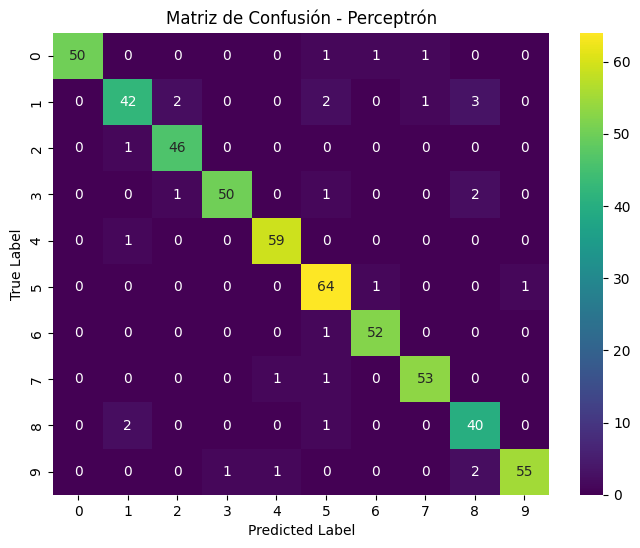

In [20]:
# Generar las predicciones con el Perceptrón y ADALINE
predictions_perceptron = perceptron.predict(X_test)

# Plot heatmap for Perceptron
plot_confusion_matrix(y_test, predictions_perceptron, "Matriz de Confusión - Perceptrón")


Precisión de ADALINE: 0.0519


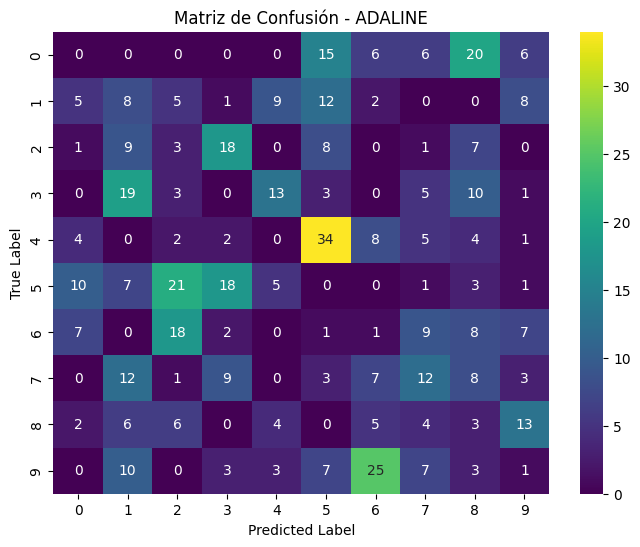

In [21]:

# Entrenar con ADALINE usando la construcción de Kesler
adaline.train_adaline_kesler(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions_adaline = adaline.predict(X_test)

# Calcular la precisión de ADALINE
accuracy_adaline = accuracy_score(y_test, predictions_adaline)
print(f"Precisión de ADALINE: {accuracy_adaline:.4f}")

predictions_adaline = adaline.predict(X_test)

# Plot heatmap for ADALINE
plot_confusion_matrix(y_test, predictions_adaline, "Matriz de Confusión - ADALINE")

In [22]:
path = r"C:\CODE\Python\Py_Redes\data\Example_8.png"
array_bn_8 = image_to_array(path)
path = r"C:\CODE\Python\Py_Redes\data\Example_3.png"
array_bn_3 = image_to_array(path)
path = r"C:\CODE\Python\Py_Redes\data\Example_1.png"
array_bn_1 = image_to_array(path)

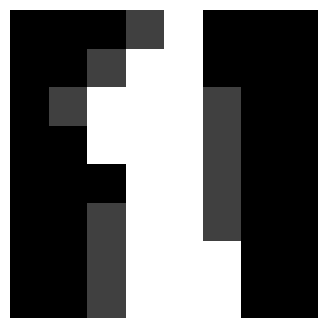

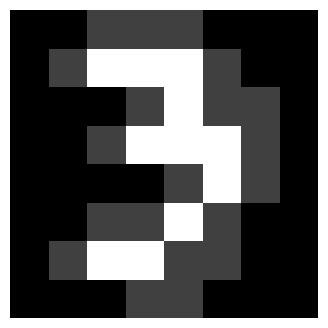

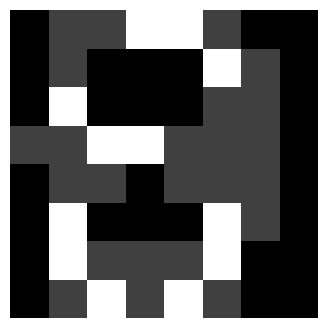

In [25]:
number(array_bn_1)
number(array_bn_3)
number(array_bn_8)

In [24]:
print(perceptron.predict(array_bn_1.reshape(1, -1) ))
print(perceptron.predict(array_bn_3.reshape(1, -1) ))
print(perceptron.predict(array_bn_8.reshape(1, -1) ))


[1]
[7]
[5]


In [26]:
print(adaline.predict(array_bn_1.reshape(1, -1) ))
print(adaline.predict(array_bn_3.reshape(1, -1) ))
print(adaline.predict(array_bn_8.reshape(1, -1) ))

[2]
[9]
[7]
